In [ ]:
# 
!cat /proc/cpuinfo
!nvidia-smi

In [ ]:
from google.colab import drive ; drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gym keras keras-rl2 tensorflow==2.1

In [ ]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import os
import pandas as pd 
from datetime import datetime as dt
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from numpy import loadtxt
from datetime import datetime
from numpy import savetxt
import random ; from random import randint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten 
from tensorflow.keras.optimizers import Adam
from rl.policy import * ; from rl.memory import * ; from rl.agents import *

In [ ]:
name = "/content/drive/MyDrive/DATA/OLD/2015_2021_M1_US30.csv"
dataframeM1 = pd.read_csv(name, encoding='utf-16',header=None, names=['Date', 'Close'] )
print(' Length M1={} '.format( len(dataframeM1)  ) )
M1 = dataframeM1['Close'].to_numpy() 
D1 = dataframeM1['Date'].to_numpy() 

 Length M1=1940372 


In [ ]:
lenData = len(M1) 
prices = M1[0:lenData]
days = D1[0:lenData]
InfoDataset = []  # [ 'Days' , 'StartIndexDay', 'EndIndexDay' ]
StartIndexDay = 1
CurrentDay    = dt.fromtimestamp(days[1]).strftime("%y-%m-%d")
Currentdays   = []

lenData
for i in range(0,lenData):
    Currentdays.append( days[i]  )
    
    
    day = dt.fromtimestamp(days[i]).strftime("%y-%m-%d")
    if(day!=CurrentDay):
       
        lenCurrentData = len( Currentdays ) 
        print(' day : {} Length : {} '.format(day,lenCurrentData) )
        
        if( lenCurrentData >50 ):
            InfoDataset.append( [CurrentDay ,StartIndexDay, i ])
        
        StartIndexDay = i+1
        Currentdays   = []
        CurrentDay = day


In [ ]:
len(InfoDataset)

1487

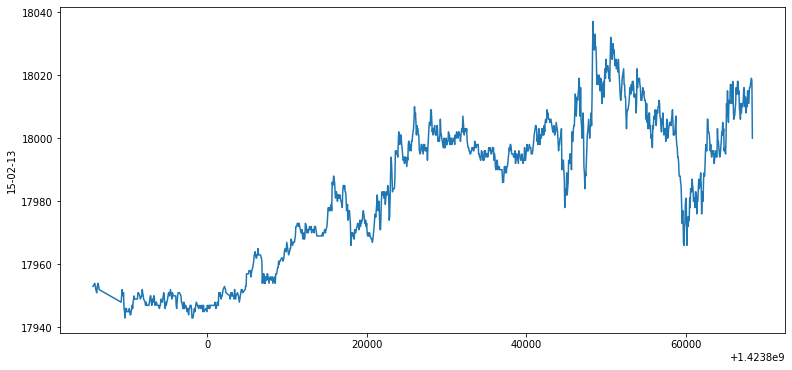

In [ ]:
for i in range(30, 31):
    plt.figure(figsize=(13, 6))
    iW = InfoDataset[i][1]
    jW = InfoDataset[i][2]
    name = InfoDataset[i][0] 
    plt.plot( days[iW:jW] , prices[iW:jW]   , label="US30 Line")
    plt.ylabel(name)
    plt.show()

In [ ]:
pricesV2      = []
daysV2        = []
pricesV3      = []
daysV3        = []
InfoDatasetV2 = []
iPosition     = 0
iTime = len(InfoDataset) 
for j in range(0,iTime ):
    #InfoDataset = []  # [ 'Days' , 'StartIndexDay', 'EndIndexDay' ]
    iStart = InfoDataset[j][1]
    iEnd   = InfoDataset[j][2]
    pricei = prices[ iStart:iEnd ]
    daysi  = days[ iStart:iEnd ]
    maxP = max(pricei)
    minP = min(pricei)
    maxD = max(daysi)
    minD = min(daysi)
    newP = []
    newD = []
    InfoDatasetV2.append( [ InfoDataset[j][0],iPosition,len(pricei) +  iPosition ] )
    for i in range(0, len(pricei)  ):
        val = round(( pricei[i] - minP )/(maxP - minP) , 8)
        #newP.append(val)
        pricesV2.append(val)
        pricesV3.append(pricei[i])
        val2 = round(( daysi[i] - minD )/(maxD - minD) , 10)
        #newD.append(val2)
        daysV2.append(val2)
        daysV3.append(daysi[i])
        iPosition = iPosition + 1


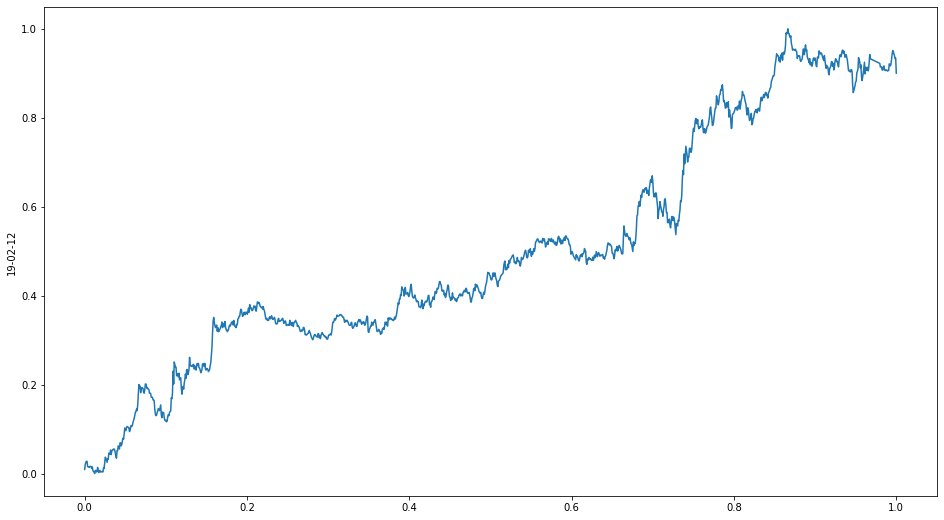

In [ ]:
for i in range(1000, 1001):
    plt.figure(figsize=(16, 9))
    iW = InfoDatasetV2[i][1]
    jW = InfoDatasetV2[i][2]
    name = InfoDatasetV2[i][0] 
    plt.plot(  daysV2[iW:jW] ,  pricesV2[iW:jW]    , label="US30 Line" )
    plt.ylabel(name)
    plt.show()

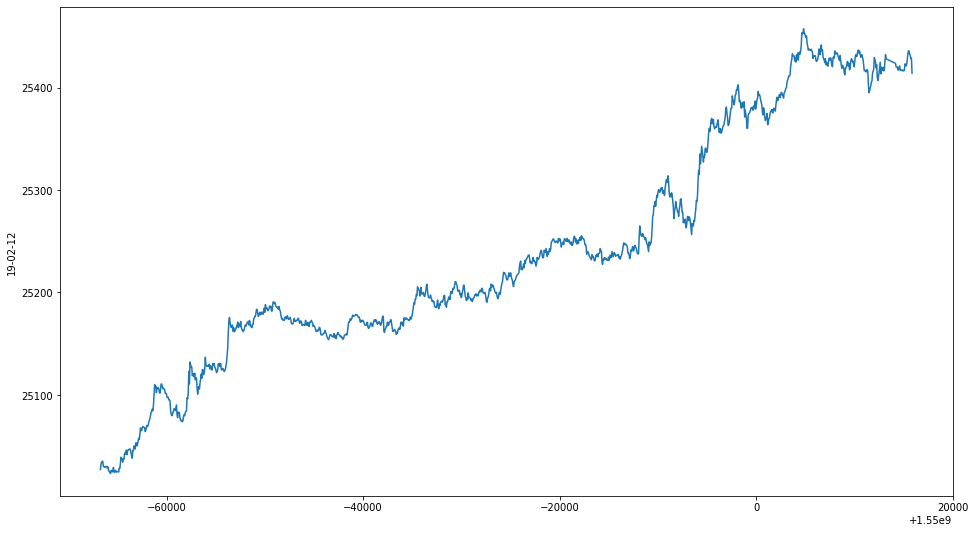

In [ ]:
for i in range(1000, 1001):
    plt.figure(figsize=(16, 9))
    iW = InfoDatasetV2[i][1]
    jW = InfoDatasetV2[i][2]
    name = InfoDatasetV2[i][0] 
    plt.plot( daysV3[iW:jW] , pricesV3[iW:jW]   , label="US30 Line")
    plt.ylabel(name)
    plt.show()

In [ ]:
#----------------------------------------------
def SMA(Data,Periodes):
    n = len(Data)-1 
    res = [Data[0]]
    for i in range(0,n):
      iSMA = 0
      for j in range(i,i+Periodes):
        if(j>=n):
          iSMA = iSMA +Data[n]
        else:
          iSMA = iSMA + Data[j]
      iSMA = iSMA/Periodes  
      res.append(iSMA)
    return res  
sma5 = SMA(pricesV2,5)
sma10 = SMA(pricesV2,10)
sma20 = SMA(pricesV2,20)
sma50 = SMA(pricesV2,50)


In [ ]:
print( len( InfoDatasetV2 ) )
print(len(sma5) )
print( len(pricesV3) )
print( len(pricesV2) )
print( max(pricesV2) )
print( min(pricesV2) )
print( max(daysV2) )
print( min(daysV2) )
print( max(pricesV3) )
print( max(daysV3) )

1487
1936242
1936242
1936242
1.0
0.0
1.0
0.0
30590.28
1609372680


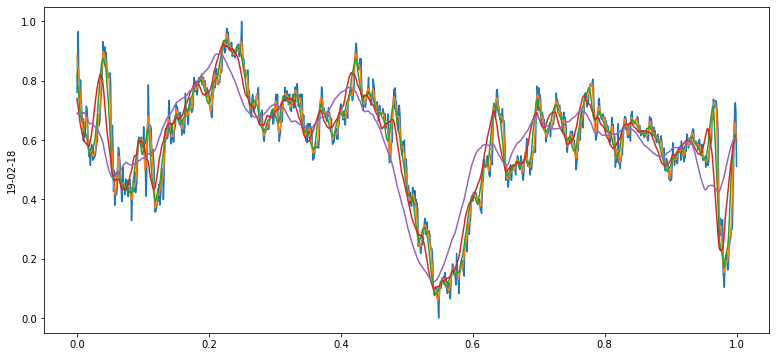

In [ ]:
for i in range(1004, 1005):
    plt.figure(figsize=(13, 6))
    iW = InfoDatasetV2[i][1]
    jW = InfoDatasetV2[i][2]
    name = InfoDatasetV2[i][0] 
    plt.plot(  daysV2[iW:jW] ,  pricesV2[iW:jW]    , label="US30 Line" )
    plt.plot(  daysV2[iW:jW] ,  sma5[iW:jW]    , label="US30 Line" )
    plt.plot(  daysV2[iW:jW] ,  sma10[iW:jW]    , label="US30 Line" )
    plt.plot(  daysV2[iW:jW] ,  sma20[iW:jW]    , label="US30 Line" )
    plt.plot(  daysV2[iW:jW] ,  sma50[iW:jW]    , label="US30 Line" )
    plt.ylabel(name)
    plt.show()

In [ ]:
# [ 'timestemp','price','%timestemp','%price','%sma5' ,'%sma10' , '%sma20', %sma50 ]
# [  daysV3 ,  pricesV3 , daysV2 , pricesV2 , sma5 , sma10 , sma20 , sma50 ]     
#print( len(daysV3) );print( len(pricesV3) );print( len(daysV2) );print( len(pricesV2) );print( len(sma5) );print( len(sma10) );print( len(sma20) );print( len(sma50) )
data = []
for i in range(0,len(daysV3)):
    data.append( [  daysV3[i] , pricesV3[i] , daysV2[i] , pricesV2[i] , sma5[i] , sma10[i] , sma20[i] , sma50[i]  ] )
info = []
for i in range(0, len(InfoDatasetV2) ):
    info.append( [  InfoDatasetV2[i][1] , InfoDatasetV2[i][2]  ] )

In [ ]:
arr     = np.array(data)
arrInfo = np.array(info)

In [ ]:
data =arr 
info = arrInfo

info = info.astype(int)
len(info)

1487

In [ ]:
def build_model(ob_space_Length, window, actions,Memoryin_window_length):
    model = Sequential()
    model.add(Dense(128,activation='relu', input_shape=(Memoryin_window_length,ob_space_Length,window) ) )
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions))
    #model.add(Flatten())
    #model.add(Dense(actions, activation='linear'))
    return model    
def build_agent(model, actions,Memoryin_window_length):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit= MemoryLimit , window_length=Memoryin_window_length)
    dqn = DQNAgent(  model=model, memory=memory      , policy=policy,
                     enable_dueling_network=True     , dueling_type='avg', 
                     nb_actions=actions              , nb_steps_warmup=1000 ,
                     gamma=0.95 
                  )
    return dqn 
model = build_model(ob_space_Length, window, actions,Memoryin_window_length)
model.summary()
dqn = build_agent(model, actions,Memoryin_window_length)
dqn.compile( Adam(lr=1e-4))    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10, 5, 128)        46208     
_________________________________________________________________
dense_7 (Dense)              (None, 10, 5, 256)        33024     
_________________________________________________________________
dense_8 (Dense)              (None, 10, 5, 256)        65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10, 5, 128)        32896     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 19203     
Total params: 197,123
Trainable params: 197,123
Non-trainable params: 0
________________________________________________

1487

# Environment ***Tasting***

In [ ]:
sma5 = data[:,4]
sma10 = data[:,5]
sma20 = data[:,6]
sma50 = data[:,7]
episodes =10
score = []
render =2
for i in range(0,episodes):
  done = False
  iWith = 0
  iWith = 0
  trades = [] 
  while not done:
    action = randint(0, 2)
    state, reward, done, info_ = env.step(action)
    if( env.x1>2  ):
      if(iWith==0):
        iWith = env.x1 - env.windowM1
      jWith = env.x1 + env.windowM1
      trades.append([ env.x1 , env.x2 , env.Loss ])
      if(len(trades)>100000 ):
        done = !done
    #env.render()

    if(done):
      prsenteg = env.NbTp*100/(env.NbSl+env.NbTp)
      score.append(prsenteg)

  ida = env.iDay
  env.reset()
  print(' Nombr de Trades : '  )
  print( len(trades) )

  print('-------------------------------------------------------------------------')
  ii = env.info[ida,0]
  jj = env.info[ida,1]
  iWith = ii
  jWith = jj
  xM1 = env.dataM1Persent[ ii:jj,0 ]
  yM1 = env.dataM1Persent[ ii:jj,1 ]
  plt.figure(figsize=(13, 6))
  plt.plot(xM1, yM1, label="US30 Line")
  plt.plot( xM1 ,sma5[iWith:jWith], label="SMA 5")
  plt.plot( xM1 ,sma10[iWith:jWith], label="SMA 10")
  plt.plot( xM1 ,sma20[iWith:jWith], label="SMA 20")
  plt.plot( xM1 ,sma50[iWith:jWith], label="SMA 50")
  for i in range(0, len(trades) ):
    Loss = trades[i][2]
    x1 = env.dataM1Persent[ trades[i][0] ,0 ]
    y1 = env.dataM1Persent[ trades[i][0] ,1 ]
    x2 = env.dataM1Persent[ trades[i][1] ,0 ]
    y2 = env.dataM1Persent[ trades[i][1] ,1 ]
    max=y1;min=y2
    if(y2>y1):
      max=y2;min=y1

    if(Loss == 1):# Sell TP
      rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="green", alpha=0.4)
      plt.plot(  x1 , y1 ,  marker='v', markersize=16, color="darkgreen")
      #plt.plot( x2 , y2 ,  marker='*', markersize=10, color="green")
      #plt.annotate('Sell at : '+str(y1), (x1 , y1 + env.TP/2 ))
      #plt.annotate('Close Win at : '+str(y2), (x2 , y2 - env.TP/2 ))
      plt.gca().add_patch(rectangle)
    if(Loss == 2):# Sell SL
      rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="red", alpha=0.4)
      plt.plot(  x1 , y1 ,  marker='v', markersize=16, color="maroon")
      #plt.plot( x2 , y2 ,  marker='x', markersize=10, color="red")
      #plt.annotate('Sell at : '+str(y1), (x1 , y1 - env.SL/2 ))
      #plt.annotate('Close Loss at : '+str(y2), (x2 , y2 + env.SL/2 ))
      plt.gca().add_patch(rectangle)

    if(Loss == 3):# Buy TP
      rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="green", alpha=0.4)
      plt.plot(  x1 , y1 ,  marker='^', markersize=16, color="darkgreen")
      #plt.plot( x2 , y2 ,  marker='*', markersize=10, color="green")
      #plt.annotate('Buy at : '+str(y1), (x1 , y1 - env.TP/2 ))
      #plt.annotate('Close Win at : '+str(y2), (x2 , y2 + env.TP/2 ))
      plt.gca().add_patch(rectangle)

    if(Loss == 4):# Buy SL
      rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="red", alpha=0.4)
      plt.plot(  x1 , y1 ,  marker='^', markersize=16, color="maroon") 
      #plt.plot( x2 , y2 ,  marker='x', markersize=10, color="red") 
      #plt.annotate('Buy at : '+str(y1), (x1 , y1 + env.SL/2 ))
      #plt.annotate('Close Loss at : '+str(y2), (x2 , y2 + env.SL/2 ))
      plt.gca().add_patch(rectangle) 


  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("Line Graph Example")
  plt.show() 
render = 0

In [ ]:
info

In [ ]:
"""
for i in range(0,2):
    action = randint(0, 2)
    env.step(action)
    env.render()
"""

'\nfor i in range(0,2):\n    action = randint(0, 2)\n    env.step(action)\n    env.render()\n'


# MODEL RETRAINING

In [ ]:
env = TradingEnv(   data , info , TP, SL)

1936242


In [ ]:
FileVersion = "WSaved/V1/"
time = datetime.now()
time = time.strftime("%H-%M-%S")
render = 0
steps = 2000
Looping = 1
NameSaving = "testing"
for i in range(0,Looping):
  dqn.fit(env, nb_steps=steps, visualize=False, verbose=2)
  time_ = datetime.now()
  time_ = time_.strftime("%H-%M-%S")
  NameSaving = FileVersion+time_+'/' +"WSaveddqn_"+str(time_)+".h5f"
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII') 
  print(NameSaving)
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII')
  dqn.save_weights(NameSaving, overwrite=True)

 Day : 24 
 1162/2000: episode: 23, duration: 3.771s, episode steps:  70, steps per second:  19, episode reward: -92.000, mean reward: -1.314 [-23.000, 17.000], mean action: 1.100 [0.000, 2.000],  loss: 56.663913, mean_q: -0.035024, mean_eps: 0.898615
 Day : 25 
 1250/2000: episode: 24, duration: 4.785s, episode steps:  88, steps per second:  18, episode reward: -38.000, mean reward: -0.432 [-23.000, 17.000], mean action: 1.182 [0.000, 2.000],  loss: 61.209628, mean_q: 0.018561, mean_eps: 0.891505
 Day : 26 
 1320/2000: episode: 25, duration: 3.804s, episode steps:  70, steps per second:  18, episode reward: -244.000, mean reward: -3.486 [-23.000, 17.000], mean action: 0.971 [0.000, 2.000],  loss: 60.753111, mean_q: 0.038320, mean_eps: 0.884395
 Day : 27 
 1321/2000: episode: 26, duration: 0.112s, episode steps:   1, steps per second:   9, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 2.000 [2.000, 2.000],  loss: 55.197052, mean_q: -0.069327, mean_eps: 0.88

# Reloud AI

In [ ]:
class Trading(Env ):
    def __init__(self, data , info ,tp_,sl_):
         #------------  observation_space  observation_space --------------------------------------------
        global ob_space_Length , window , render , fee , sDay , eDay
        self.windowM1 = window   # 360Min = 6H (Best View) 
        self.dataM1  = data[:,0:2]
        self.info = info 
        self.dataM1Persent  = data[:,2:4]
        self.lengthM1 = len( self.dataM1) 
        print( self.lengthM1  )
        self.observation_space = Box(low= 0.0, high= 1.0, shape=( ob_space_Length ,self.windowM1), dtype=np.float64 )
        self.action_space = Discrete(3)

        #------------  Parameters --------------------------------------------
        self.DayStep =  1380      #1380
        self.iDay = sDay
        self.iwin = 0               # iWindow [ 0 - (length_data - window ) ]
        self.SL = sl_
        self.TP = tp_

        self.sma5 = data[:,4]
        self.sma10 = data[:,5]
        self.sma20 = data[:,6]
        self.sma50 = data[:,7]
        self.isrender = render
        self.state=np.array([ self.dataM1Persent[ 0:self.windowM1,1] , 
                             self.sma5[ 0:self.windowM1] ,
                             self.sma10[ 0:self.windowM1] ,
                             self.sma20[ 0:self.windowM1] ,
                             self.sma50[ 0:self.windowM1]     ])
        self.Pips  = 0 
        self.AllReward = 0
        self.NbTp  = 0
        self.NbSl  = 0
        self.R      = []
        self.Rmin     = []
        self.x1=0;self.x2=0;self.Loss = 0 #[1=SellTp 2 = SellSL 3=BuyTp 4=BuySL ]

    def step(self, action):
        isPrinting=0
        #Incremontion  (is Day don!) (is M1 || M5 Limet) () 
        reward = 0
        self.x1=0;self.x2=0;self.Loss = 0
        iaccPrice = self.info[ self.iDay ,0]  + self.windowM1 + self.iwin
        accPrice  = self.dataM1[iaccPrice , 1]
        newprice = 0
        
        if(action==0):# sell
          #Sell don!
          self.iwin = self.iwin + 1
          for i in range(iaccPrice, self.info[ self.iDay ,1] ):
              newprice = self.dataM1[i,1]
              if( newprice<= (accPrice-self.TP) ):
                self.NbTp = self.NbTp +1
                reward =  self.TP -fee
                self.x1 = iaccPrice
                self.x2 = i
                self.Loss = 1
                self.Pips = self.Pips + reward
                self.iwin = self.iwin + (i-iaccPrice) -1
                if(isPrinting==1):
                  print(' Day : {} . iWin : {} . Action : {} . From : {} . To {} . reward:{} . pips : {} '.format( self.iDay , self.iwin ,  action , accPrice , newprice, reward , self.Pips ))
          
                break
              if( newprice>= (accPrice+self.SL) ):
                self.NbSl = self.NbSl +1
                reward = -1*self.SL -fee
                self.x1 = iaccPrice
                self.x2 = i
                self.Loss = 2
                self.Pips = self.Pips + reward
                self.iwin = self.iwin + (i-iaccPrice) -1
                if(isPrinting==1):
                  print(' Day : {} . iWin : {} . Action : {} . From : {} . To {} . reward:{} . pips : {} '.format( self.iDay , self.iwin ,  action , accPrice , newprice, reward , self.Pips ))
          
                break
          

        if(action==1):# Buy
          #Buy don! 
          self.iwin = self.iwin + 1 
          for i in range(iaccPrice, self.info[ self.iDay ,1] ):
              newprice = self.dataM1[i,1]
              if( newprice>= (accPrice+self.TP) ):
                self.NbTp = self.NbTp +1
                reward =  self.TP -fee
                self.x1 = iaccPrice
                self.x2 = i
                self.Loss = 3
                self.Pips = self.Pips + reward
                self.iwin = self.iwin + (i-iaccPrice) -1
                if(isPrinting==1):
                  print(' Day : {} . iWin : {} . Action : {} . From : {} . To {} . reward:{} . pips : {} '.format( self.iDay , self.iwin ,  action , accPrice , newprice, reward , self.Pips ))
          
                break
              if( newprice<=(accPrice-self.SL) ):
                self.NbSl = self.NbSl +1
                reward = -1*self.SL -fee
                self.x1 = iaccPrice
                self.x2 = i
                self.Loss = 4
                self.Pips = self.Pips + reward 
                self.iwin = self.iwin + (i-iaccPrice) -1
                if(isPrinting==1):
                  print(' Day : {} . iWin : {} . Action : {} . From : {} . To {} . reward:{} . pips : {} '.format( self.iDay , self.iwin ,  action , accPrice , newprice, reward , self.Pips ))
          
                break
           
          

        if(action==2):# none
          #none don!
          reward = 0
          self.iwin = self.iwin + 1

        
        
        # Check if shower is done
        #if self.iwin >= ( self.info[ self.iDay ,1] - self.info[ self.iDay ,0] - self.windowM1 ) :
        if self.iwin >= (self.info[ self.iDay ,1] -  self.info[ self.iDay ,0] - self.windowM1  ) :
            done = True
            for i in range( len(self.Rmin) , 100 ):
              self.Rmin.append(0)
            self.R.append(self.Rmin)  
            self.Rmin = []
            print('Day : {}'.format(self.iDay))
            if( (self.isrender==1) | (isPrinting==2) ):
                  print(' Day : {} '.format(self.iDay)  )
                  #print(' Day : {} . iWin : {} . Action : {} . From : {} . To {} . reward:{} . pips : {} '.format( self.iDay , self.iwin ,  action , accPrice , newprice, reward , self.Pips ))
                  #print('------------------------------- SL = {} . TP = {} . All Trade = {} . Persent = {}%'.format(self.NbSl,self.NbTp ,(self.NbSl+self.NbTp) , self.NbTp*100/(self.NbSl+self.NbTp)  ) )

        else:
            done = False
        info_ = {}
        self.AllReward = self.AllReward + reward
        i2 = iaccPrice
        i1 = iaccPrice - self.windowM1
        #self.state = self.dataM1['Close'][  i1:i2]
        self.state=np.array([ self.dataM1Persent[ i1:i2 ,1 ],
                              self.sma5[i1:i2], 
                              self.sma10[i1:i2], 
                              self.sma20[i1:i2], 
                              self.sma50[i1:i2]   ])
        pp = self.info[ self.iDay ,1] -  self.info[ self.iDay ,0] - self.windowM1
        #print(' iWin : {} . . . . . info {} '.format(self.iwin, pp ))
        self.Rmin.append( reward )
        return self.state, reward, done, info_
    def setNbDay(self,nb):
        self.iDay = nb
    def render(self):
        if( self.x1>2  ):
          #a = datatest['Date'].apply(dt.fromtimestamp)
          iWith = self.x1 - self.windowM1
          jWith = self.x1 + self.windowM1

          xM1 = self.dataM1Persent[ iWith:jWith,0 ]
          yM1 = self.dataM1Persent[ iWith:jWith,1 ]
          plt.figure(figsize=(13, 6))
          plt.plot( xM1, yM1, label="US30 Line") 
          plt.plot( xM1 ,sma5[iWith:jWith] , label="SMA 5") 
          plt.plot( xM1 ,sma10[iWith:jWith], label="SMA 10") 
          plt.plot( xM1 ,sma20[iWith:jWith], label="SMA 20") 
          plt.plot( xM1 ,sma50[iWith:jWith], label="SMA 50") 
          x1 = self.dataM1Persent[self.x1,0]
          y1 = self.dataM1Persent[ self.x1,1] 
          x2 = self.dataM1Persent[self.x2,0]
          y2 = self.dataM1Persent[ self.x2,1]

          max=y1;min=y2
          if(y2>y1):
            max=y2;min=y1
          if(self.Loss == 1):# Sell TP
            rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="green", alpha=0.4)
            plt.plot(  x1 , y1 ,  marker='v', markersize=16, color="darkgreen") 
            plt.plot( x2 , y2 ,  marker='*', markersize=10, color="green") 
            plt.annotate('Sell at : '+str(y1), (x1 , y1 + self.TP/2 ))
            plt.annotate('Close Win at : '+str(y2), (x2 , y2 - self.TP/2 ))
            plt.gca().add_patch(rectangle)
          if(self.Loss == 2):# Sell SL
            rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="red", alpha=0.4)
            plt.plot(  x1 , y1 ,  marker='v', markersize=16, color="maroon") 
            plt.plot( x2 , y2 ,  marker='x', markersize=10, color="red") 
            plt.annotate('Sell at : '+str(y1), (x1 , y1 - self.SL/2 ))
            plt.annotate('Close Loss at : '+str(y2), (x2 , y2 + self.SL/2 ))
            plt.gca().add_patch(rectangle)

          if(self.Loss == 3):# Buy TP
            rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="green", alpha=0.4)
            plt.plot(  x1 , y1 ,  marker='^', markersize=16, color="darkgreen") 
            plt.plot( x2 , y2 ,  marker='*', markersize=10, color="green") 
            plt.annotate('Buy at : '+str(y1), (x1 , y1 - self.TP/2 ))
            plt.annotate('Close Win at : '+str(y2), (x2 , y2 + self.TP/2 ))
            plt.gca().add_patch(rectangle) 

          if(self.Loss == 4):# Buy SL
            rectangle = plt.Rectangle((x1,min), (x2-x1),(max-min) ,facecolor="red", alpha=0.4)
            plt.plot(  x1 , y1 ,  marker='^', markersize=16, color="maroon") 
            plt.plot( x2 , y2 ,  marker='x', markersize=10, color="red") 
            plt.annotate('Buy at : '+str(y1), (x1 , y1 + self.SL/2 ))
            plt.annotate('Close Loss at : '+str(y2), (x2 , y2 + self.SL/2 ))
            plt.gca().add_patch(rectangle) 

          plt.xlabel("x axis")
          plt.ylabel("y axis")
          plt.title("Line Graph Example")
          plt.show()
    def printr(self):
        v = self.NbSl+self.NbTp
        if(v==0):
            v=1  
        print('--- Day N:{} ----- reward : {}  .  SL = {} . TP = {} . All Trade = {} . Persent = {}%'.format(
           self.iDay , self.AllReward   , self.NbSl,self.NbTp ,(self.NbSl+self.NbTp) , round(self.NbTp*100/v,2)  ) )
        #print('------%={}%  --------'.format(self.NbTp*100/v  ))

    def reset(self):
        # Reset shower temperature
        if(render==2):
          self.printr()
        self.Pips  = 0 
        self.AllReward = 0
        self.iwin = 0
        self.iDay+=1
        i1 = (self.iDay*self.DayStep   + self.iwin)
        i2 = (self.iDay*self.DayStep  + self.windowM1 + self.iwin)
        self.state=np.array([ self.dataM1Persent[ i1:i2,1 ]  ,
                      self.sma5[i1:i2], 
                      self.sma10[i1:i2], 
                      self.sma20[i1:i2], 
                      self.sma50[i1:i2]   ])
        self.trades=[ ]
        self.NbSl = 0
        self.NbTp = 0
        #if(  (self.iDay*self.DayStep  + self.windowM1 + self.iwin+self.DayStep)>=self.lengthM1 ):
        if( self.iDay>=eDay ):
           self.iDay=sDay
        if( self.iDay>= len(self.info) ):
           self.iDay=sDay
        
        # Reset shower time

        return self.state
#-----------------------------------------------------------------

In [ ]:
#      Max DATA2 2529



In [ ]:
sDay                        = 1200
eDay                        = 1400
name = "/content/drive/MyDrive/DATA/OLD/2015_2021_M1_US30.csv"
name  = '/content/drive/MyDrive/W/8H0_5M/WSaveddqn_19-26-31.h5f'
dqn.load_weights(name)
env = Trading(   data , info , TP, SL)
_ = dqn.test(env, nb_episodes=200, visualize=False)

1936242
Testing for 200 episodes ...
Day : 1201
Episode 1: reward: 229.000, steps: 88
Day : 1202
Episode 2: reward: 190.000, steps: 50
Day : 1203
Episode 3: reward: 96.000, steps: 17
Day : 1204
Episode 4: reward: 77.000, steps: 34
Day : 1205
Episode 5: reward: -7.000, steps: 81
Day : 1206
Episode 6: reward: -29.000, steps: 12
Day : 1207
Episode 7: reward: 4.000, steps: 32
Day : 1208
Episode 8: reward: 126.000, steps: 52
Day : 1209
Episode 9: reward: 169.000, steps: 105
Day : 1210
Episode 10: reward: 247.000, steps: 79
Day : 1211
Episode 11: reward: 161.000, steps: 111
Day : 1212
Episode 12: reward: 197.000, steps: 53
Day : 1213
Episode 13: reward: -117.000, steps: 40
Day : 1214
Episode 14: reward: 383.000, steps: 77
Day : 1215
Episode 15: reward: 292.000, steps: 60
Day : 1216
Episode 16: reward: 159.000, steps: 68
Day : 1217
Episode 17: reward: 84.000, steps: 72
Day : 1218
Episode 18: reward: 89.000, steps: 46
Day : 1219
Episode 19: reward: 168.000, steps: 61
Day : 1220
Episode 20: rew

KeyboardInterrupt: ignored

In [ ]:
x = []
y = []
p = 0
s = 0
for i in range(0, len(env.R)  ):
  for j in range( 0 , len(env.R[i]) -1  ):
    s = s + env.R[i][j]
    if ( env.R[i][j] != 0 ):
      x.append(s)
      y.append(p)
      p = p + 1
  #print('Sume : {} '.format(s))  

In [ ]:
len(y)/200

46.89

In [ ]:
len(x)/3 

9531.333333333334

9531

3

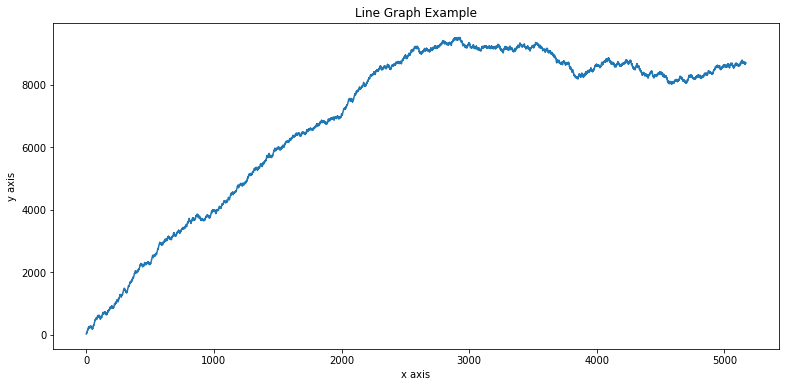

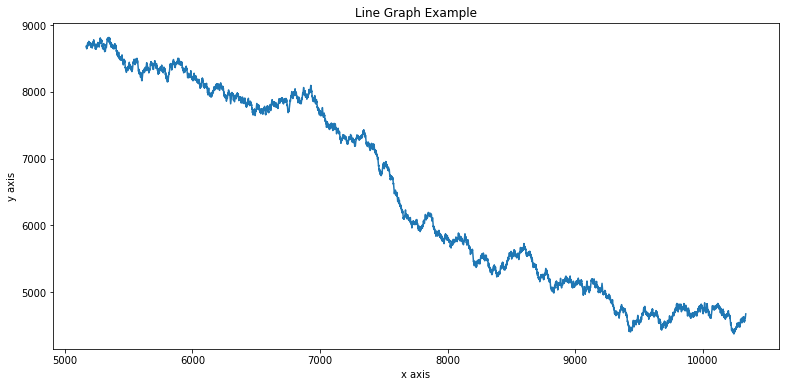

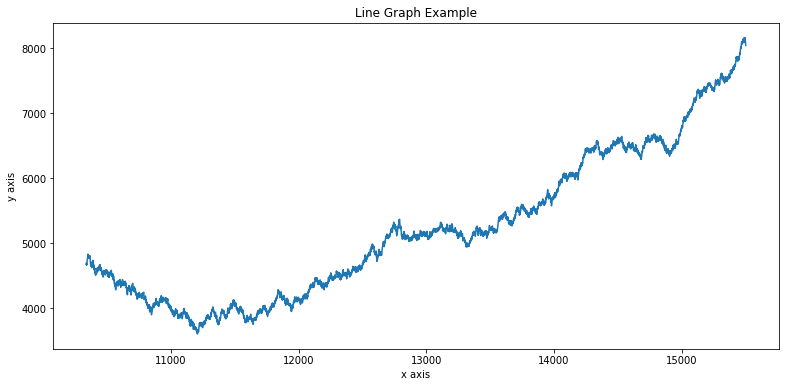

In [ ]:
k = 3
l = 0
for i in range(0,k):
  m = int (len(x)/k )
  x1 = x[ l:(m + m*i) ]
  y1 = y[ l:(m + m*i) ]
  plt.figure(figsize=(13, 6))
  plt.plot( y1, x1, label="US30 Line") 
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("Line Graph Example")
  plt.show()  # 200
  l = (m + m*i)

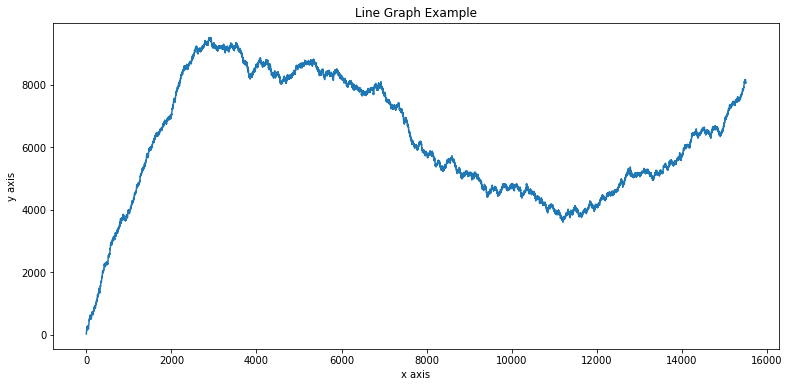

In [ ]:

plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 200
l = (m + m*i)

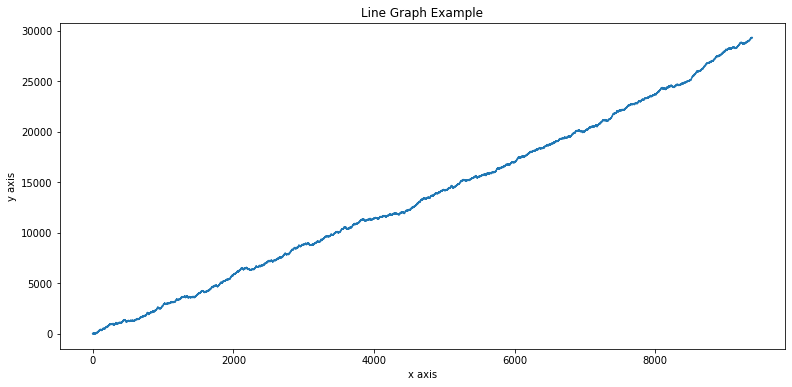

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 200

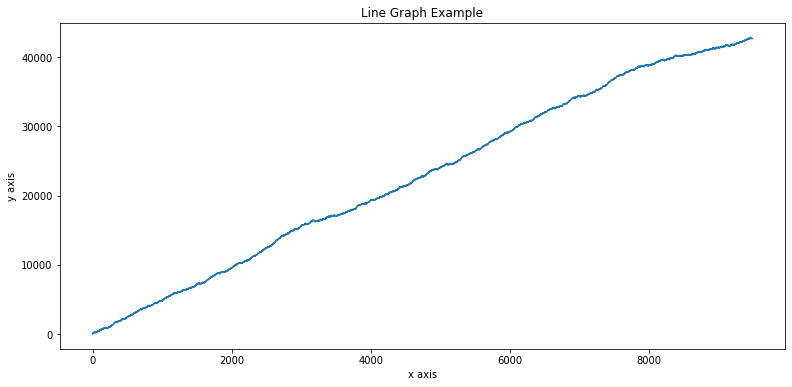

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # ALL

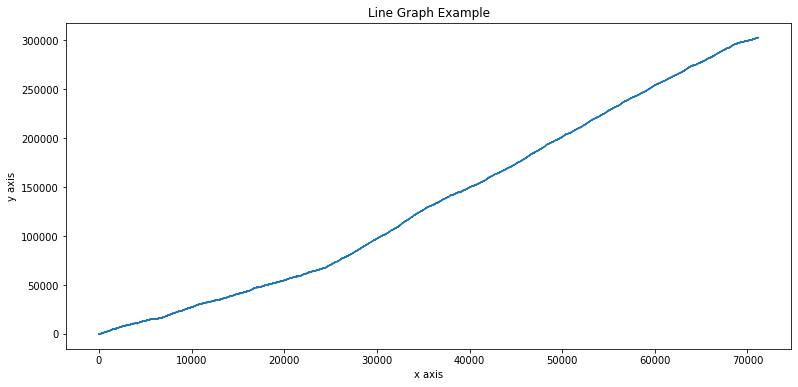

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # ALL

In [ ]:
#_____________________________________________

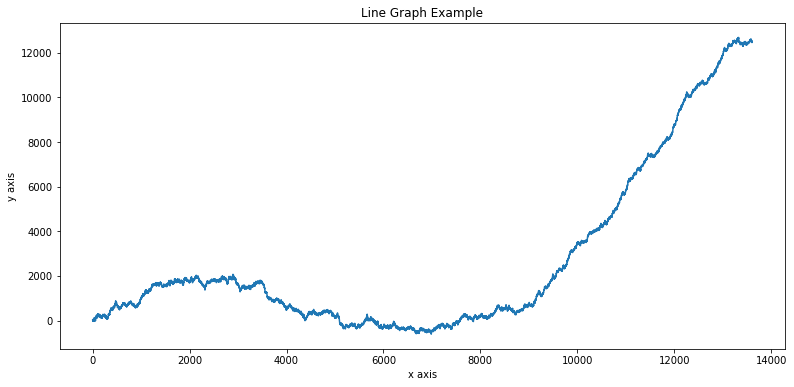

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # ALL

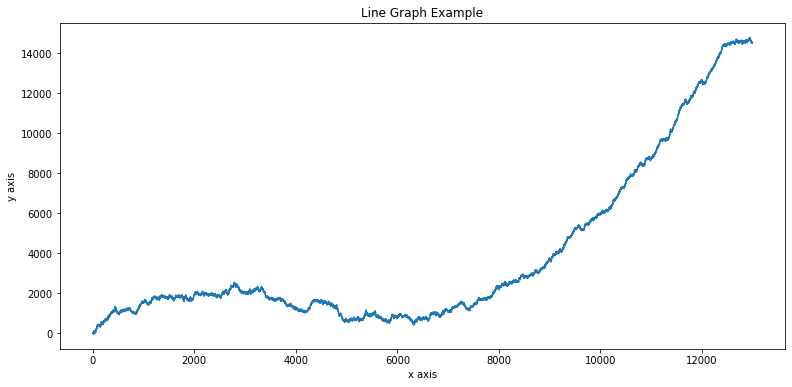

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 600

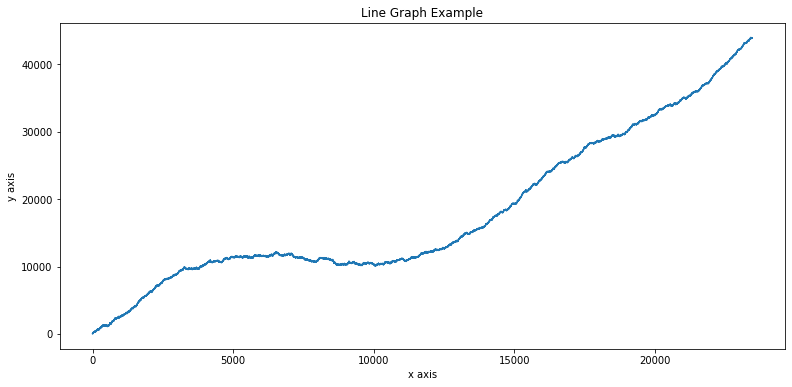

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # ALL

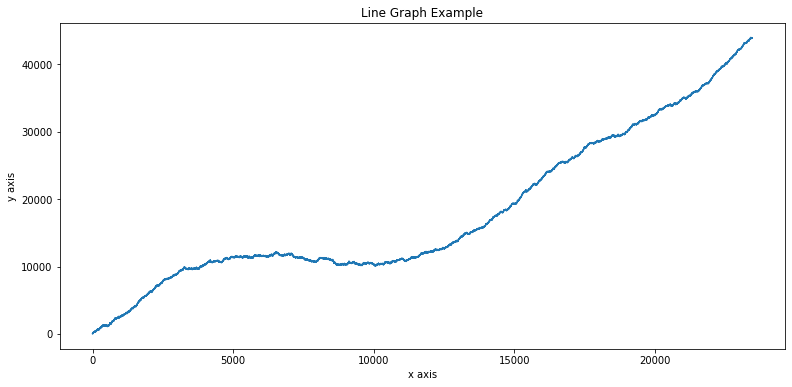

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # ALL

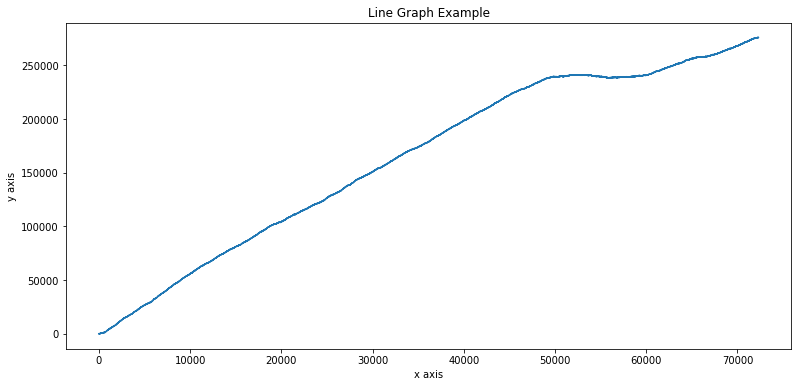

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # ALL

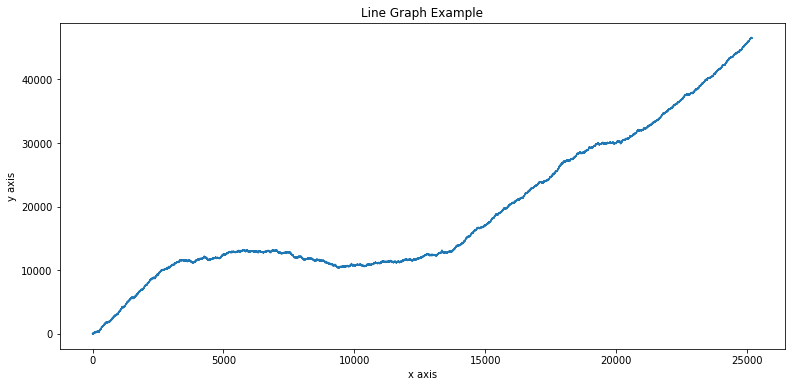

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 200

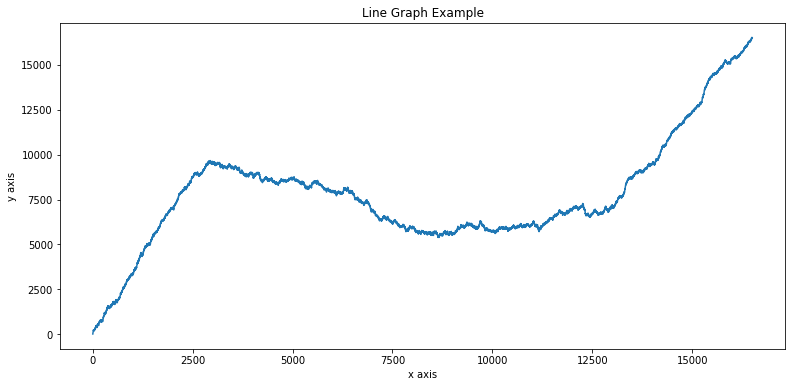

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 200

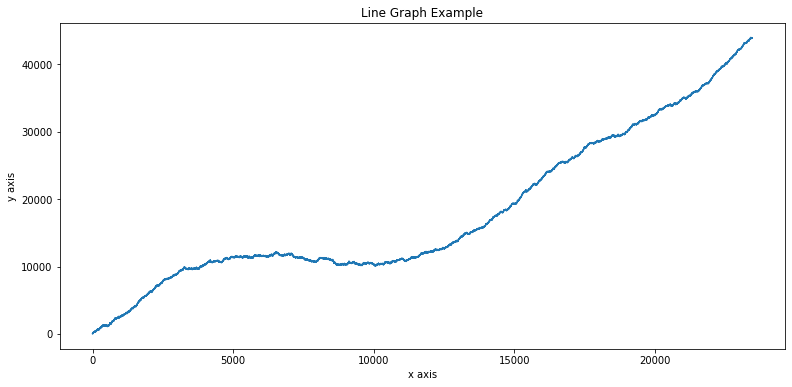

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # ALL

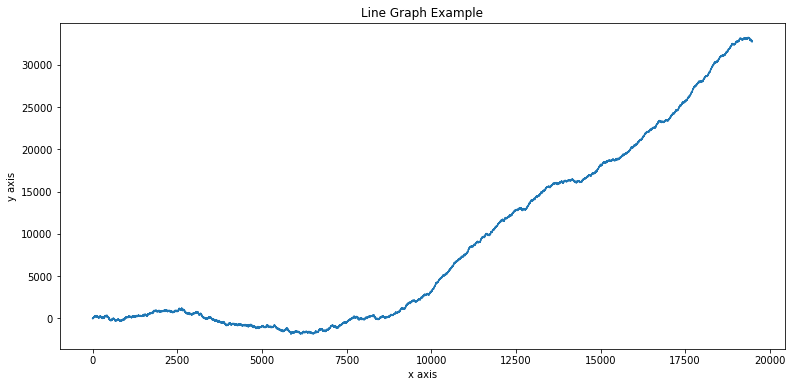

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 130

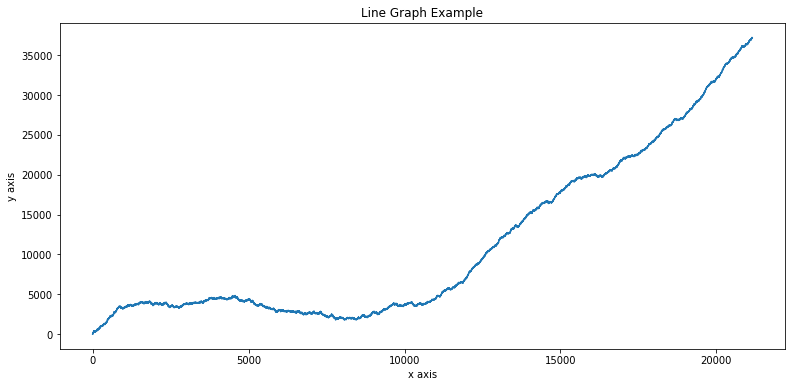

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 150

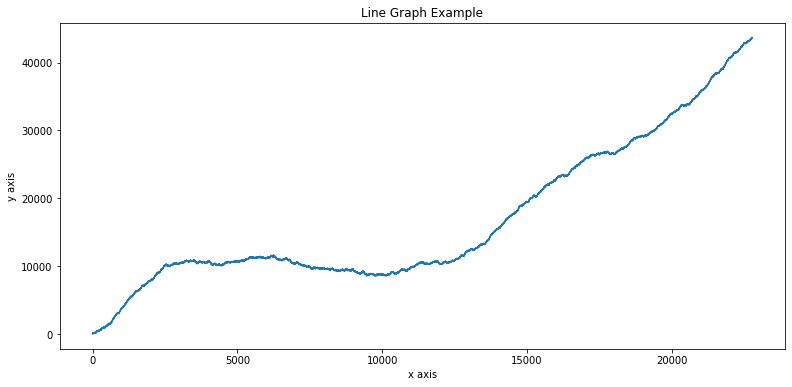

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 200

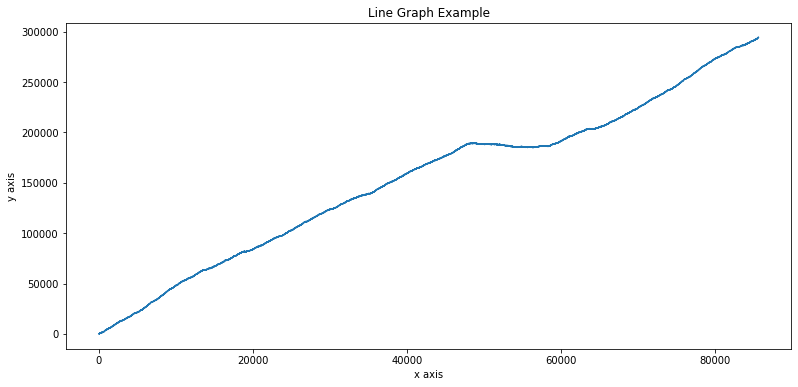

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # All 2k

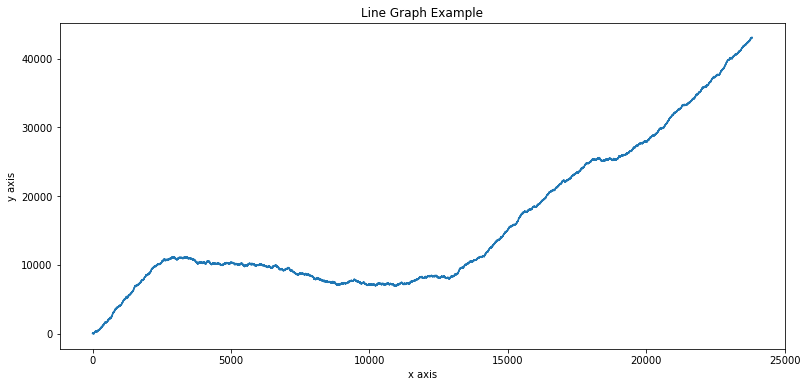

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show()  # 200

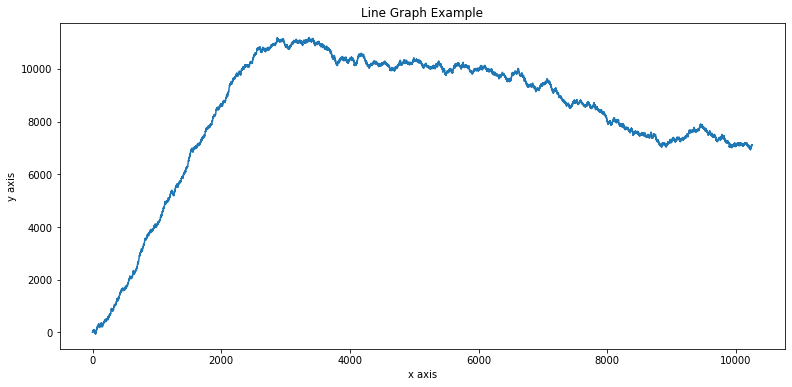

In [ ]:

plt.figure(figsize=(13, 6))
plt.plot( y, x, label="US30 Line") 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.show() #90